In [2]:
import pandas as pd
import numpy as np

## Exploratory Data Analysis

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import squarify 
import matplotlib
import pylab
import matplotlib.dates as mdates

In [6]:
food_reviews_eda = pd.read_csv('EDA.csv')

In [7]:
#Unique productids and userid
print (len(food_reviews_eda.productid.unique()), len(food_reviews_eda.userid.unique()))

74258 256056


In [8]:
food_reviews_eda.describe()

# Total 525k records or reviews of 74k unique products by 256k unique users.
# Data ranges from 1999 to 2012 , granularity - daily and user/product level
# Data is skewed towards positive sentiment

,Unnamed: 0,year,month,helpful_upvotes,helpful_responses,helpfulness_score,rating,sentiment
count,568452.000000,568452.000000,568452.000000,568452.000000,568452.000000,568452.000000,568452.000000,568452.000000
mean,284227.307977,2010.582869,6.460287,1.743813,2.228813,-0.067210,4.183198,0.855684
std,164098.401572,1.531850,3.406379,7.636526,8.289755,0.922166,1.310438,0.351411
min,0.000000,1999.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,0.000000
25%,142114.750000,2010.000000,3.000000,0.000000,0.000000,-1.000000,4.000000,1.000000
50%,284227.500000,2011.000000,7.000000,0.000000,1.000000,0.000000,5.000000,1.000000
75%,426340.250000,2012.000000,9.000000,2.000000,2.000000,1.000000,5.000000,1.000000
max,568453.000000,2012.000000,12.000000,866.000000,923.000000,1.000000,5.000000,1.000000


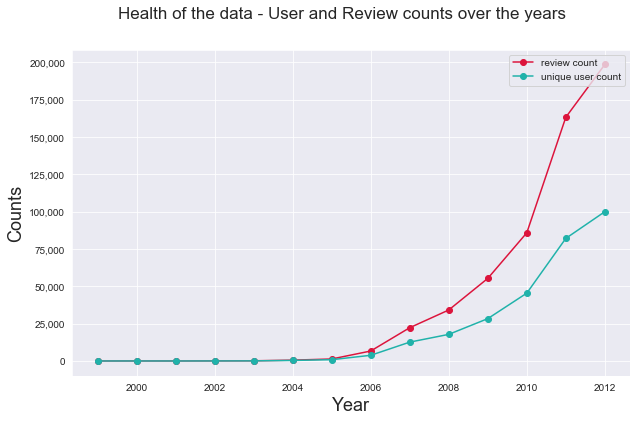

In [9]:
# Health of the data
df1 = food_reviews_eda.groupby(['year']).size().reset_index(name='reviewcount')
df1 = df1.sort_values(by='year')

df2 = food_reviews_eda.groupby(['year']).userid.nunique().reset_index(name='usercount')
df2 = df2.sort_values(by='year')

# Plotting
sns.set_style("darkgrid")
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
plt.plot('year', 'reviewcount', label = 'review count', data=df1, marker='o', color='crimson')
plt.plot('year', 'usercount', label = 'unique user count', data=df2, marker='o', color='lightseagreen')

# Format plots
fig.suptitle('Health of the data - User and Review counts over the years', fontsize=17)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Counts', fontsize=18)
pylab.legend(loc='upper right')
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda y, p: format(int(y), ',')))

# Display
plt.show()

In [10]:
# product wise grouped info
df1 = food_reviews.groupby(['productid']).rating.mean().reset_index(name='avg_rating')
df1 = df1.sort_values(by='productid')

df2 = food_reviews.groupby(['productid']).size().reset_index(name='review_count')
df2 = df2.sort_values(by='productid')

df3 = []
df3 = pd.DataFrame(df3)
df3['productid'] = df1['productid']
df3['avg_rating'] = df1['avg_rating']
df3['review_count'] = df2['review_count']
#df3.head()

# Distribution of products in data based on rating and review counts
# Plotting
sns.set_style("darkgrid")
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.kdeplot(df3['avg_rating'], shade=True, color="mediumvioletred")

# Format plots
fig.suptitle('Distribution of the products in data based on avg rating', fontsize=16)
plt.xlabel('Avg Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Display
plt.show()

NameError: name 'food_reviews' is not defined

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is t

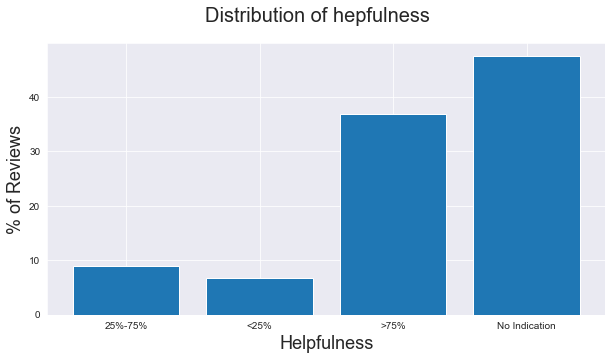

'\n Helpful reviews had more than 75% of voters find the review helpful,\n unhelpful reviews had less than 25% of voters find the review helpful, and an intermediate group of 25-75% helpfulness. \n This choice of division seemed to not have a larger impact on results; we will henceforth use this terminology to describe \n the helpfulness of reviews. Among reviews that are voted on, helpful reviews are the most common.\n '

In [11]:
# Distribution of data based on helpfuness
df1 = food_reviews_eda
df1['hpercent'] = ""
df1.hpercent[df1['helpfulness_score'] > 0.25 ] = "> 75%"
df1.hpercent[df1['helpfulness_score'] < 0.75 ] = "25%-75%"
df1.hpercent[df1['helpfulness_score'] < 0.25 ] = "< 25%"
df1.hpercent[df1['helpfulness_score'] == -1 ] = "No Indication"
df2 = df1.groupby(['hpercent']).size().reset_index(name = 'hpercent2')
df2['prop'] = df2['hpercent2']*100/len(df1)

height = df2['prop']
bars = ('25%-75%', '<25%', '>75%', 'No Indication')
y_pos = np.arange(len(bars))

 # Plotting
sns.set_style("darkgrid")
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

# Create bars
plt.bar(y_pos, height)
# Create names on the x-axis
plt.xticks(y_pos, bars)

# Format plots
fig.suptitle('Distribution of hepfulness', fontsize=20)
plt.xlabel('Helpfulness', fontsize=18)
plt.ylabel('% of Reviews', fontsize=18)

# Display
plt.show()

"""
 Helpful reviews had more than 75% of voters find the review helpful,
 unhelpful reviews had less than 25% of voters find the review helpful, and an intermediate group of 25-75% helpfulness. 
 This choice of division seemed to not have a larger impact on results; we will henceforth use this terminology to describe 
 the helpfulness of reviews. Among reviews that are voted on, helpful reviews are the most common.
 """

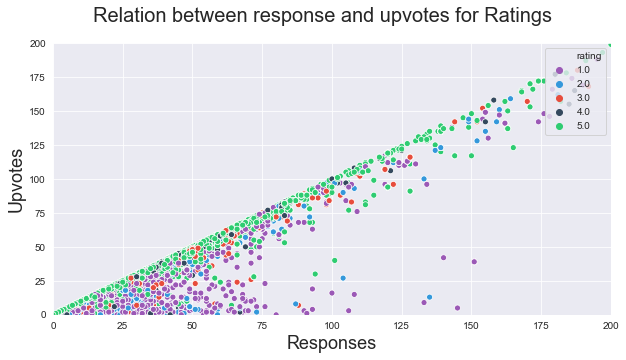

In [13]:
# relation between upvotes and response and rating
df1 = food_reviews_eda

flatui = ["#9b59b6", "#3498db", "#e74c3c", "#34495e", "#2ecc71"]

# Plotting
sns.set_style("darkgrid")
#cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax = sns.scatterplot(x="helpful_responses", y="helpful_upvotes", hue="rating",palette=sns.color_palette(flatui),data=df1)

# Format plots
fig.suptitle('Relation between response and upvotes for Ratings', fontsize=20)
plt.xlabel('Responses', fontsize=18)
plt.ylabel('Upvotes', fontsize=18)
pylab.legend(loc='upper right')
plt.ylim(0, 200)
plt.xlim(0, 200)

# Display
plt.show()

# higher rated products are likely to get upvotes equal to responses, meaning that other users generally find 
# higher rated reviews of products very helpful, infact more helpful than negative reviews 


In [15]:
# Distribution of data based on helpfuness
df1 = food_reviews_eda
df1['hpercent'] = ""
df1.hpercent[df1['helpfulness_score'] > 0.25 ] = "> 75%"
df1.hpercent[df1['helpfulness_score'] < 0.75 ] = "25%-75%"
df1.hpercent[df1['helpfulness_score'] < 0.25 ] = "< 25%"
df1.hpercent[df1['helpfulness_score'] == -1 ] = "No Indication"
df2 = df1.groupby(['hpercent','sentiment']).size()
df3 = df2.groupby(level=0).apply(lambda x: x/x.sum() * 100)
pd.DataFrame(df3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is t

0
hpercent      sentiment           
25%-75%       0          40.691646
              1          59.308354
< 25%         0          41.018809
              1          58.981191
> 75%         0          10.871997
              1          89.128003
No Indication 0           8.468739
              1          91.531261